# Classification using XGboost

* Basic usage: predicting diabetes

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

In [5]:
dir_processed = '../data/processed'

## Data preparation

In [6]:
data_file = os.path.join(dir_processed, 'pima-indians-diabetes.data.csv')

In [7]:
dataset = np.loadtxt(data_file, delimiter=",", skiprows=0)

In [8]:
X = dataset[:,:8]
Y = dataset[:,8]

In [9]:
#df_diab = pd.read_csv(data_file, header=None)
#df_diab.head()

In [10]:
# X2 = df_diab.loc[:,:7].values
# Y2 = df_diab[8].values

In [11]:
seed = 123
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Train model

In [12]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [13]:
predictions = xgb.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, predictions)
print('Accuracy', round(accuracy*100, 2))

Accuracy 76.38


In [15]:
predict_probs = xgb.predict_proba(X_test)

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, predict_probs[:,1])

In [30]:
roc_auc = 
roc_auc

0.8371199684811872

Text(0, 0.5, 'tpr')

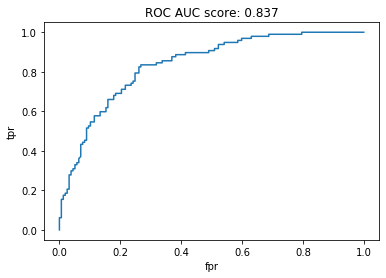

In [42]:
plt.title('ROC AUC score: ' + str(round(auc(fpr, tpr), 3)))
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')